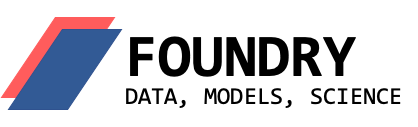

# Foundry Fashion MNIST Tutorial for Beginners
This introduction uses Foundry to:


1.   Load data from Foundry
2.   Use a DLHub predictive model from Foundry
3.   Create local metadata and dataframe

This is a [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb#scrollTo=5fCEDCU_qrC0) notebook, which allows you to run python code in the browser. Just press the play button that appears on the left side of the code cells when you hover over them, and the code will run here.


# Installing Foundry
First we'll need to install Foundry and MDF.

In [ ]:
!pip install foundry_ml

In [ ]:
!pip install mdf_connect_client

Due to a recent FuncX update, we need to use FuncX 0.0.5 (FuncX is included in the Foundry install). This is a temporary fix that makes sure we have the version we need.

In [ ]:
!pip install funcx==0.0.5

# Importing and Instantiating Foundry
Now we can import Foundry!

In [ ]:
from foundry import Foundry

We'll also need to instantiate it. To do so locally, you'll use:

In [ ]:
f = Foundry()

If you're using Foundry in the cloud (as in here in Google Colab), you'll use:

In [ ]:
f = Foundry(no_local_server=True, no_browser=True)

# Loading the Data
We can load the data and assign it to variables using `f.load()` and `f.load_data()`.

In [ ]:
f = f.load("_test_blaiszik_foundry_iris_v2.1")
X,y = f.load_data()

Let's see what we've loaded:

In [ ]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

,y
0,0
1,0
2,0
3,0
4,0


We can also use `f.describe()` to see more information about the dataset, such as the creators, publisher, publication year, etc. You can see all the details below.

In [ ]:
f.describe()

DC:{'creators': [{'affiliations': ['University of Chicago', 'Argonne National Laboratory'], 'creatorName': 'Blaiszik, Ben', 'familyName': 'Blaiszik', 'givenName': 'Ben'}], 'dates': [{'date': '2020-02-05', 'dateType': 'Accepted'}], 'identifier': {'identifier': '10.23677/t0lb-l3av', 'identifierType': 'DOI'}, 'publicationYear': 2020, 'publisher': 'Materials Data Facility', 'resourceType': {'resourceType': 'Dataset', 'resourceTypeGeneral': 'Dataset'}, 'subjects': [{'subject': 'machine learning'}, {'subject': 'foundry'}], 'titles': [{'title': 'Foundry - Iris Dataset'}]}
Dataset:{"inputs": ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"], "outputs": ["y"], "input_descriptions": ["sepal length in unit(cm)", "sepal width in unit(cm)", "petal length in unit(cm)", "petal width in unit(cm)"], "output_descriptions": ["flower type"], "type": "tabular", "version": "", "short_name": "iris"}


# Running the Data Through a DLHub Predictive Model
We'll be using Foundry to access a model on DLHub. This is as easy as `f.run()`!

In [ ]:
f.run('rjacobs3_wisc/iris_svm',X.sample(10).values.tolist())

[[[0.009716171956844901, 0.041436849322038886, 0.9488469787211163],
  [0.008055766824374009, 0.9704956239086331, 0.02144860926699304],
  [0.13144827809996973, 0.8418626728268126, 0.026689049073217584],
  [0.014387784949916549, 0.1504827559402477, 0.835129459109836],
  [0.003748440437930993, 0.005091796571793564, 0.9911597629902755],
  [0.9820416935317711, 0.011690100148634799, 0.006268206319594258],
  [0.013582653344871569, 0.20833032226925885, 0.7780870243858697],
  [0.9797413960476501, 0.012902429851813398, 0.007356174100536466],
  [0.9718727874853048, 0.01853972535431475, 0.009587487160380529],
  [0.008760175788461938, 0.04980328954494598, 0.9414365346665922]]]

# Only Run To Create Local Metadata and Dataframe

In [ ]:
from sklearn import datasets
import pandas as pd
import json

iris = datasets.load_iris()
df_x = pd.DataFrame(iris.data,columns=iris.feature_names)
df_y = pd.DataFrame(iris.target,columns=['Y'])
df = pd.concat([df_x,df_y],axis=1)
df.head()
df.to_json("foundry_dataframe.json")

In [ ]:
iris_dict = {
    "dc":{},
    "mdf":{},
    "foundry":{
        "inputs":['sepal length (cm)',
                 'sepal width (cm)',
                 'petal length (cm)',
                 'petal width (cm)'],
        "outputs":['Y'],
        "type":"tabular"
    }
}

with open('foundry_metadata.json', 'w') as meta_file:
  json.dump(iris_dict, meta_file)